# STA365 Week 2 Python code

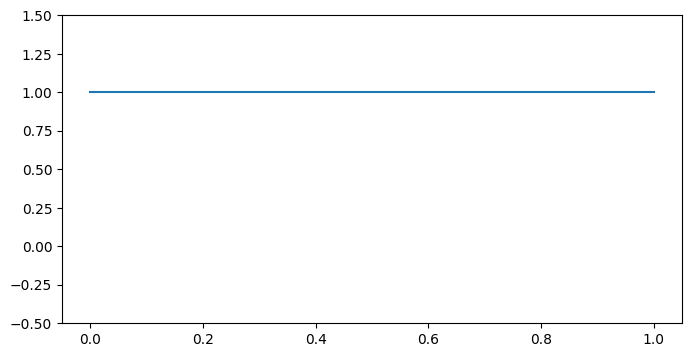

In [1]:
# 导入需要的 Python 包
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# 定义 Beta 分布的参数 (alpha & beta) 和参数空间
alpha, beta = 1, 1  # Beta 分布的形状参数 alpha 和 beta
parameter_domain = np.linspace(0, 1, 1000)  # 参数空间从 0 到 1，划分为 1000 个点

# 定义先验分布 (prior distribution) 为一个 Beta 分布
prior = stats.beta(a=alpha, b=beta)

# 画 Beta 分布的概率密度函数 (PDF)
plt.figure(figsize=(8, 4))  # 设置图像大小
plt.ylim([-0.5, 1.5])  # 设置 y 轴范围
plt.plot(parameter_domain, prior.pdf(parameter_domain))  # 画 PDF 曲线

# 为什么是一条直线？因为 Beta(1,1) = Uniform(0,1) 分布

In [2]:
prior.cdf(.2) # CDF = P(X <= x), so CDF(0.2) = P(X <= 0.2)，然后 if X ~ Unif(0,1), then P(X <= x) = x for all x in [0,1], 所以输出是 0.2

np.float64(0.2)

In [3]:
# 从 prior 分布中随机生成 10000 个实现值，并计算小于 0.2 的比例
m = 10000
(prior.rvs(m) < 0.2).mean()


np.float64(0.2)

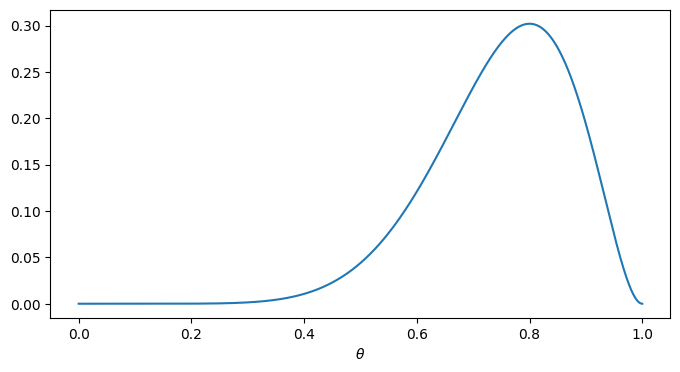

In [4]:
# 定义实验参数和观察结果
n, x = 10, 8  # 总试验次数 n=10，观测到的成功次数 x=8，这显然是一个 binomial 的分布

# 定义 likelihood 函数
likelihood = lambda theta: stats.binom(n=n, p=theta).pmf(x)

# 画出 likelihood 函数
plt.figure(figsize=(8, 4))  # 设置图像大小
plt.xlabel('$\\theta$')  # 设置 x 轴标签
plt.plot(parameter_domain, likelihood(parameter_domain))  # 画 likelihood 函数曲线


Posterior 分布复习

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$

### _The posterior is always proportional to the joint (joint = likelihood x prior)

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$



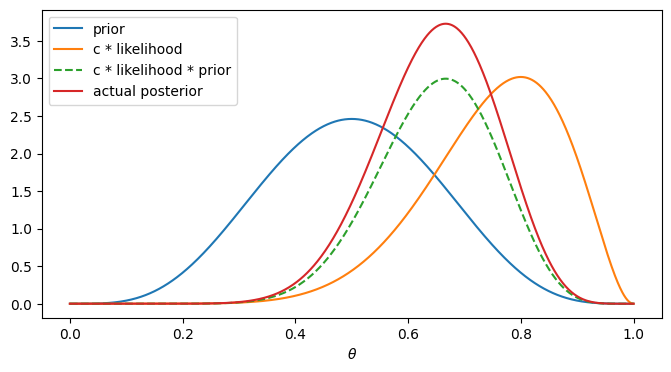

In [5]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1001)
prior = stats.beta(a=alpha,b=beta) # beta prior

plt.plot(parameter_domain, prior.pdf(parameter_domain), 
         label='prior')

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom(n,p=p).pmf(x)

c = 10
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='c * likelihood')
plt.plot(parameter_domain, 
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * prior', linestyle="--")

posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain), 
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

从以上图中印证了我们学的理论：

理论 1：Prior 和 likelihood 融合成 posterior。的确，蓝线 prior 在左边，橘线 likelihood 在右边，红线 posterior 在它们中间（融合、中和、它俩的平衡）

理论 2：Posterior proportional to  likelihood * prior 。也就是 posterior 是 likelihood * prior * constant。的确，可以看到红线 posterior 和 绿线 likelihood * prior 位置和形状一样，就差一个倍数 (constant)。

# Probability Questions 2

---

1. Estimate $\Pr(a \leq \theta \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling 
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$?
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution?


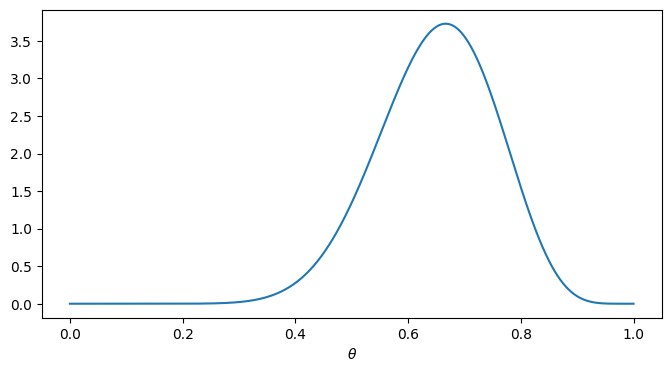

In [6]:
# 画出 posterior 分布
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x) # 注意，这里是我课件讲的公式：ikelihood = Binomial(n, p), prior = Beta(alpha,beta), posterior = Beta(alpha+x, beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));

In [7]:
m = 1000 
posterior_m = posterior.rvs(m) # 从 posterior 分布随机抽取 m 个实现值
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)] # 取得 m 的 0.025 和 0.975 的 quantiles

(np.float64(0.44796067980182547), np.float64(0.8275625880197167))

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$

In [10]:
# Set this to be exact for our sample
(posterior_m < sorted(posterior_m)[int(m/40)]).mean()

np.float64(0.025)

In [11]:
# Set this to be exact for our sample
(posterior_m < sorted(posterior_m)[-int(m/40)]).mean()

np.float64(0.975)

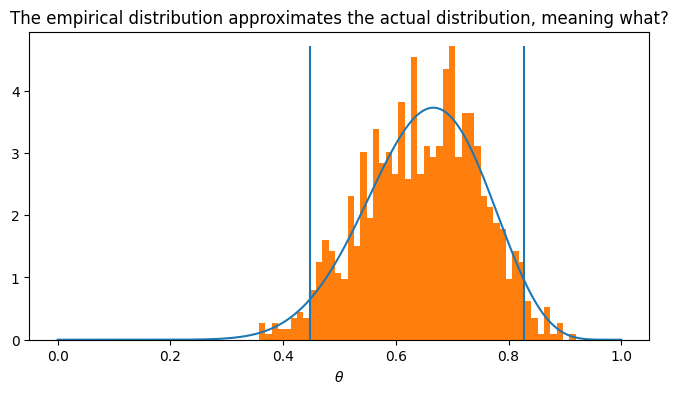

In [12]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

# Bayesian Credible interval
plt.vlines([sorted(posterior_m)[int(m/40)],
            sorted(posterior_m)[-int(m/40)]],0,hist[0].max())

# 橘色 histogram 是 1000 个从 posterior 分布随机抽取的实现值的样本分布
# 蓝色曲线是 posterior 分布的真实分布函数 （theoretical/true probability density function）
# 蓝色直线是 95% credible interval 的位置

# 95% credible interval 的解释：参数会有 95% 的概率会落在计算出的 95% credible interval 区间里
# 本题例子：Binomial 分布的参数 p (某事件成功概率）落在 [0.436, 0.824] 这个 95% credible interval 区间里面的概率是 95%

# Frequentist 对应的 95% confidence interval 没有这么简单干脆和直观的解释

# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

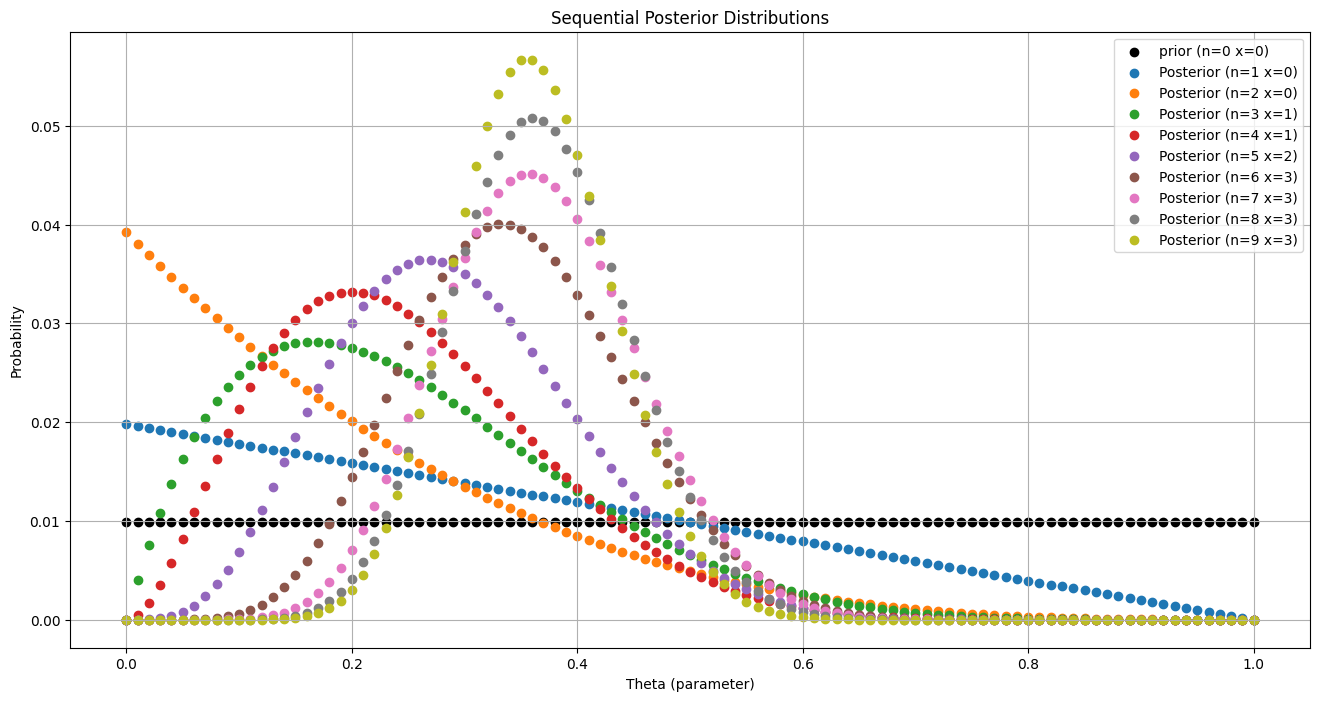

In [13]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    
    # Binomial likelihood for batch update
    likelihood = parameter_domain ** x * (1 - parameter_domain) ** (n - x)
    
    # Posterior proportional to likelihood * prior
    posterior = likelihood * prior
    posterior /= posterior.sum()  # Normalize to make it a valid probability distribution
    
    # Update prior for next iteration
    prior = posterior
    
    # Plot the posterior
    plt.scatter(parameter_domain, posterior, label=f"Posterior (n={n} x={x})")

plt.title("Sequential Posterior Distributions")
plt.xlabel("Theta (parameter)")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data

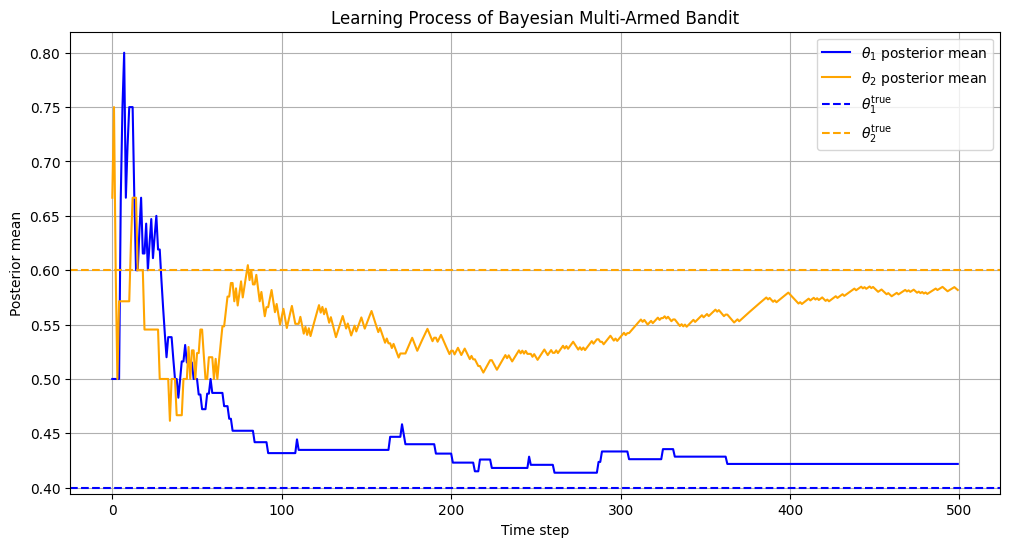

Final estimate for theta1: 0.422
Final estimate for theta2: 0.582


In [18]:
# Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Set true success probabilities for the two arms
theta1_true = 0.4  # True parameter for arm 1
theta2_true = 0.6  # True parameter for arm 2

# Initialize priors for Beta distributions
alpha1, beta1 = 1, 1  # Prior parameters for arm 1
alpha2, beta2 = 1, 1  # Prior parameters for arm 2

# Initialize counters
n1, x1 = 0, 0  # Counts for arm 1
n2, x2 = 0, 0  # Counts for arm 2

# Number of iterations
m = 500
num_samples = 1000  # Number of samples for Monte Carlo estimation

# Store history of posterior means
posterior_means_arm1 = []
posterior_means_arm2 = []

# Bayesian Multi-Armed Bandit Algorithm
for t in range(m):
    # Monte Carlo sampling to estimate Pr(theta1 < theta2)
    theta1_samples = beta.rvs(alpha1 + x1, beta1 + n1 - x1, size=num_samples)
    theta2_samples = beta.rvs(alpha2 + x2, beta2 + n2 - x2, size=num_samples)
    
    prob_theta1_less_theta2 = np.mean(theta1_samples < theta2_samples)
    
    # Flip a coin to decide which arm to pull
    if np.random.rand() < prob_theta1_less_theta2:
        # Pull arm 2
        success = np.random.rand() < theta2_true
        n2 += 1
        x2 += success
    else:
        # Pull arm 1
        success = np.random.rand() < theta1_true
        n1 += 1
        x1 += success
    
    # Record posterior means
    posterior_means_arm1.append((alpha1 + x1) / (alpha1 + beta1 + n1))
    posterior_means_arm2.append((alpha2 + x2) / (alpha2 + beta2 + n2))

# Plot the posterior mean trajectories
plt.figure(figsize=(12, 6))
plt.plot(posterior_means_arm1, label=r"$\theta_1$ posterior mean", color="blue")
plt.plot(posterior_means_arm2, label=r"$\theta_2$ posterior mean", color="orange")
plt.axhline(theta1_true, color="blue", linestyle="--", label=r"$\theta_1^{\text{true}}$")
plt.axhline(theta2_true, color="orange", linestyle="--", label=r"$\theta_2^{\text{true}}$")
plt.xlabel("Time step")
plt.ylabel("Posterior mean")
plt.title("Learning Process of Bayesian Multi-Armed Bandit")
plt.legend()
plt.grid()
plt.show()

# Print final estimates
print(f"Final estimate for theta1: {(alpha1 + x1) / (alpha1 + beta1 + n1):.3f}")
print(f"Final estimate for theta2: {(alpha2 + x2) / (alpha2 + beta2 + n2):.3f}")


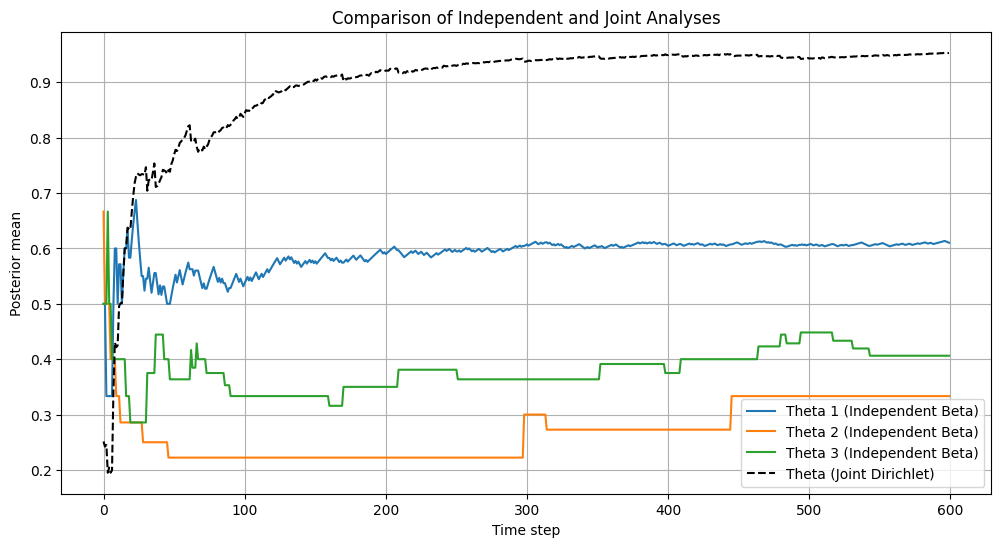

Final posterior mean estimates (Independent Beta-Binomial):
Theta 1: 0.610
Theta 2: 0.333
Theta 3: 0.406

Final posterior mean estimate for Theta (Joint Dirichlet): 0.953


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# True success probabilities for three entities
theta_true = [0.6, 0.4, 0.5]  # True parameters for entities 1, 2, 3

# Prior parameters for Beta distributions (Independent Analysis)
alpha_prior = [1, 1, 1]  # Alpha parameters for entities
beta_prior = [1, 1, 1]   # Beta parameters for entities

# Counters for successes and trials for each entity
n = [0, 0, 0]  # Total trials for each entity
x = [0, 0, 0]  # Successes for each entity

# Number of iterations
m = 600
num_samples = 1000  # Monte Carlo samples for probability estimation
epsilon = 1e-6      # Small positive constant for Dirichlet stability

# Storage for posterior means
posterior_means_independent = [[] for _ in range(3)]
posterior_means_joint = []

# Bayesian Multi-Armed Bandit Algorithm
for t in range(m):
    # ---- Analysis 1: Independent Beta-Binomial ----
    # Draw samples from Beta distributions for each entity
    theta_samples = [beta.rvs(alpha_prior[i] + x[i], beta_prior[i] + n[i] - x[i], size=num_samples) for i in range(3)]
    
    # Compute the probability that Entity 1 is the best (as an example)
    prob_theta1_best = np.mean((theta_samples[0] > theta_samples[1]) & (theta_samples[0] > theta_samples[2]))
    
    # Decide which entity to sample based on probabilities
    if np.random.rand() < prob_theta1_best:
        chosen = 0
    elif np.random.rand() < np.mean((theta_samples[1] > theta_samples[2])):
        chosen = 1
    else:
        chosen = 2

    # Simulate success or failure for the chosen entity
    success = np.random.rand() < theta_true[chosen]
    n[chosen] += 1
    x[chosen] += success

    # Record posterior means for Independent Analysis
    for i in range(3):
        posterior_means_independent[i].append((alpha_prior[i] + x[i]) / (alpha_prior[i] + beta_prior[i] + n[i]))

    # ---- Analysis 2: Joint Dirichlet-Multinomial ----
    # Compute Dirichlet parameters
    dirichlet_params = [alpha_prior[i] + x[i] + epsilon for i in range(3)]
    dirichlet_posterior = dirichlet.rvs(dirichlet_params, size=num_samples)
    
    # Compute the probability that Entity 1 is the best
    prob_theta1_best_joint = np.mean((dirichlet_posterior[:, 0] > dirichlet_posterior[:, 1]) & 
                                     (dirichlet_posterior[:, 0] > dirichlet_posterior[:, 2]))
    
    # Record joint posterior mean for Entity 1
    posterior_means_joint.append(np.mean(dirichlet_posterior[:, 0]))

# Plot Results 
plt.figure(figsize=(12, 6))

# Plot posterior means for Independent Beta-Binomial Analysis
for i in range(3):
    plt.plot(posterior_means_independent[i], label=f"Theta {i+1} (Independent Beta)")

# Plot posterior mean for Joint Dirichlet-Multinomial Analysis (Entity 1 as an example)
plt.plot(posterior_means_joint, label="Theta (Joint Dirichlet)", linestyle="--", color="black")

# Add labels and legends
plt.xlabel("Time step")
plt.ylabel("Posterior mean")
plt.title("Comparison of Independent and Joint Analyses")
plt.legend()
plt.grid()
plt.show()

# Print final posterior mean estimates
print("Final posterior mean estimates (Independent Beta-Binomial):")
for i in range(3):
    print(f"Theta {i+1}: {(alpha_prior[i] + x[i]) / (alpha_prior[i] + beta_prior[i] + n[i]):.3f}")

print(f"\nFinal posterior mean estimate for Theta (Joint Dirichlet): {posterior_means_joint[-1]:.3f}")